In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from sklearn.datasets.samples_generator import make_circles

In [6]:
X, y = make_circles(n_samples = 1000,
                    noise=0.1, 
                    factor=0.2, 
                    random_state=0)

In [7]:
X

array([[ 0.24265541,  0.0383196 ],
       [ 0.04433036, -0.05667334],
       [-0.78677748, -0.75718576],
       ..., 
       [ 0.0161236 , -0.00548034],
       [ 0.20624715,  0.09769677],
       [-0.19186631,  0.08916672]])

In [8]:
X.shape

(1000, 2)

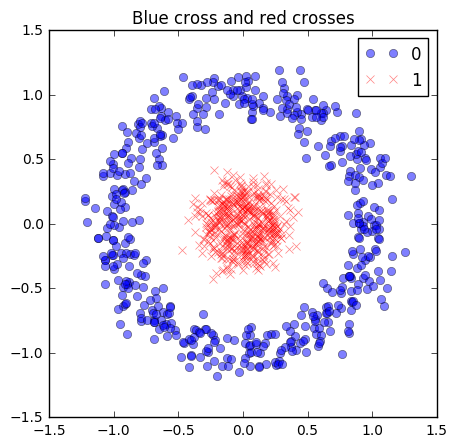

In [11]:
plt.figure(figsize=(5,5))
plt.plot(X[y==0,0], X[y==0,1], 'ob', alpha=0.5)
plt.plot(X[y==1,0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue cross and red crosses")

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [19]:
model = Sequential()
model.add(Dense(4, input_shape=[2,], activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(SGD(lr=0.0001), 'binary_crossentropy', metrics=['accuracy'])

In [20]:
model.fit(X, y, nb_epoch = 200)

Epoch 1/200
1000/1000 [==============================] - 0s - loss: 4.5450 - acc: 0.5000      
Epoch 2/200
1

In [21]:
hticks = np.linspace(-1.5, 1.5, 101)
vticks = np.linspace(-1.5, 1.5, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]
c = model.predict(ab)
cc = c.reshape(aa.shape)

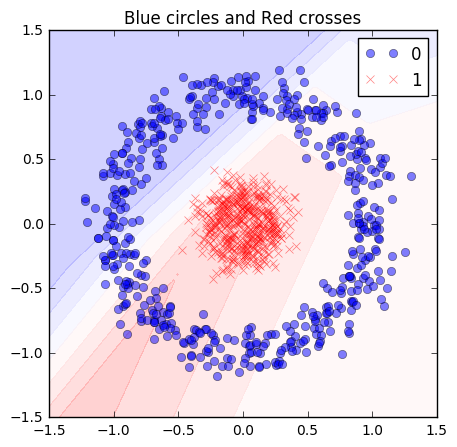

In [24]:
plt.figure(figsize=(5,5))
plt.contourf(aa, bb, cc, cmap='bwr', alpha = 0.2)
plt.plot(X[y==0,0], X[y==0,1], 'ob', alpha=0.5)
plt.plot(X[y==1,0], X[y==1,1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title('Blue circles and Red crosses')